In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
def plot_normal_ecdf(n):
    sorted_z = np.sort(stats.norm.rvs(size=n))
    zmin = sorted_z[0]
    zmax = sorted_z[-1]
    
    # Staircase coordinates (z0, 0), (z0, 1/n), (z1, 1/n), (z1, 2/n), ..., (zn-1, 1)
    # x_steps: Repeat each z-value twice
    x_steps = np.repeat(sorted_z, 2)
    
    # y_steps: starts at 0, repeat each probability level twice, ends at 1
    # Probability levels [0/n, 1/n, 2/n, ..., n/n]
    probs = np.arange(0, n + 1) / n
    y_steps = np.repeat(probs, 2)[1:-1]

    plt.figure(figsize=(6, 4))
    plt.xlim(-4, 4)
    plt.ylim(-0.05, 1.05)
    
    plt.plot(x_steps, y_steps, color='red', lw=2, label='Empirical CDF')
    plt.plot([zmax, 4], [1, 1], color='red', lw=2)
    plt.plot([-4, zmin], [0, 0], color='red', lw=2) 

    x_ref = np.arange(-4, 4.1, 0.1)
    plt.plot(x_ref, stats.norm.cdf(x_ref), lw=2, color='darkblue', label='Standard Normal CDF')

    plt.legend(fontsize=10)
    plt.title(f'Empirical CDF of {n} IID Standard Normals', size=15);

# Lecture 10: Empirical Distributions and the Bootstrap

**Data 145, Spring 2026: Evidence and Uncertainty**  

**Instructors:** Ani Adhikari, William Fithian

---

**Please run all the code cells above before you start reading.** 

---

We ended the last lecture with the observation that with high probability, the empirical distribution of a large i.i.d. will look like the underlying distribution. This motivates the use of the empirical distribution of the sample as a substitute for the "population" or underlying distribution, as you've seen in the bootstrap used in Data 8 and Data 100.

In this lecture we will study empirical distributions and the bootstrap. Let's start with a bridge between the parametric world and the empirical distribution world.

## 1. Parametric Bootstrap
We've done a lot of MLE theory, and in our examples we were able to calculate both the MLE and the Fisher information analytically. This allowed us to estimate the Fisher information from the sample by plugging in the estimate of the parameter into its formula if necessary. This in turn allowed us to estimate the standard error of our estimate and construct an approximate 95\% confidence interval for the parameter as
$$
\text{estimate of the parameter} ~ \pm ~ 2\text{(estimated SE of the estimate)}
$$

But there are situations where there's no analytic formula for the MLE, let alone the Fisher information and the variance of the estimate. Or even if we can handle the MLE analytically, we might be interested in estimating a function of it and our estimate $T = T(X_1, X_2, \ldots, X_n)$ is complicated. It might be quite hard to find the standard error of $T$ analytically.

The *parametric bootstrap* gives us a way out of this problem.

Suppose the sample $X_1, X_2, \ldots, X_n$ is i.i.d. from the distribution $f_\theta$, and our goal is to estimate a function of $\theta$. The parametric boostrap has three steps.
- Use the original sample to construct an estimate $\hat{\theta}$ of the parameter $\theta$. Here $\hat{\theta}$ is typically the MLE calculated either analytically or by numerical optimization.
- Simulate $B$ samples from the distribution $f_{\hat{\theta}}$. That is, do the following $B$ times:
    - Simulate $X_1^* X_2^*, \ldots, X_n^*$ i.i.d. from the distribution $f_{\hat{\theta}}$.
    - Calculate $T^* = T(X_1^* X_2^*, \ldots, X_n^*)$.
- Find the empirical standard error of the $B$ simulated values of the statistic.

---

## 2. Empirical Distribution
Now suppose the sample $X_1, X_2, \ldots, X_n$ is i.i.d. from some distribution whose cdf is $F$. But don't assume any particular parametric form for that distribution. This is the *nonparametric bootstrap* setting.

Let's start formalizing the "distribution of the sample". Every distribution has a cdf and is completely determined by the cdf. So we'll use the cdf to specify distributions.

The hope is to understand the distribution $F$ via the empirical distribution of the sample. This is a discrete distribution that puts mass $1/n$ at each sampled element.

Define the *empirical cdf* of the sample by

$$
F_n(x) ~ = ~ \frac{1}{n} \sum_{i=1}^n I(X_i \le x), ~~~~~ -\infty < x < \infty
$$

For each $x$, $F_n(x)$ is the proportion of sampled elements whose values are are at most $x$. This is a random proportion.

By the WLLN, for each $x$ we have $F_n(x) \xrightarrow{P} F(x)$. In fact the convergence is stronger but we won't go into that. 

The figure below shows that the empirical cdf of the sample in the case where we have an i.i.d. sample of size 100 from the standard normal distribution. The blue curve is the standard normal cdf. The empirical cdf gets closer to the underlying cdf as the sample size increases.

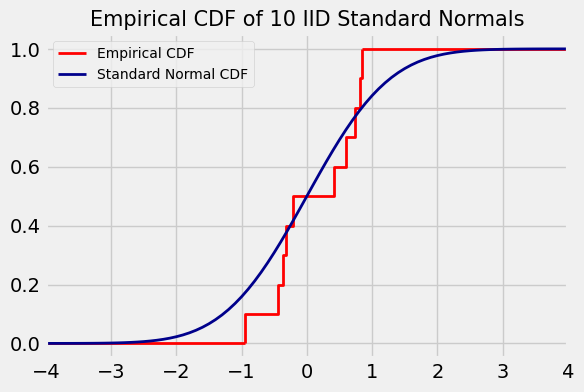

In [7]:
plot_normal_ecdf(10) # argument = sample size

---

[**Disclaimer:** Formal proofs of the results below need care and are beyond the scope of this course. Your exercises will be a workout in all the methods below.]

---
## 3. Nonparametric Bootstrap

In Data 8, the [bootstrap method](https://inferentialthinking.com/chapters/13/2/Bootstrap.html#the-bootstrap-resampling-from-the-sample) assumes that the sample $X_1, X_2, \ldots, X_n$ is i.i.d. from some distribution but it doesn't assume any particular parametric form for that distribution. This is the *nonparametric bootstrap* setting.

Suppose you have an sample $X_1, X_2, \ldots, X_n$ that is i.i.d. with underlying cdf $F$. And suppose you want the probability distribution of a statistic $T(X_1, X_2, \ldots, X_n)$. This is also called the sampling distribution of $T$.

If the distribution of $T$ is hard to find analytically, you can use the nonparametric bootstrap method based on resampling from the original sample.

The procedure can be described as follows, with $B$ denoting the number of replications of the resampling process and $F_n$ the empirical cdf of the original sample.

Do the following $B$ times:
- Draw an i.i.d. sample $X_1^*, X_2^*, \ldots, X_n^*$ from $F_n$.
- Calculate $T(X_1^*, X_2^*, \ldots, X_n^*)$.

This results in $B$ i.i.d. copies of $T$, each drawn from $F_n$. These $B$ values create a bootstrap empirical distribution of $T$. If $n$ and $B$ are both large, this empirical distribution is likely to be close to the distribution of $T$.

You've know this since Data 8. We won't attempt to prove it here. Just note if $T$ is complicated and calculating its variance analytically is intractable, then the variance of the bootstrap distribution of $T$ is likely to be a good estimate of the variance of $T$ if $n$ and $B$ are both large.

---

## 4. Bootstrap Confidence Intervals
Suppose you are trying to estimate a numerical feature of the underlying distribution of the sample. For example, you may want to estimate the median of the underlying distribution. We will call that the parameter, though it is not a parameter associated with a specified family of distributions.

### Normal Interval
Let $T$ be the estimate computed based on the original sample. Bootstrap the sample to estimate the standard error of $T$, and call this estimate $\hat{\text{se}}_T$. Then an approximate $100(1 - \alpha)\%$ confidence interval for the parameter is
$$
T \pm z_{\alpha/2} \hat{\text{se}}_T
$$
where $P(Z > z_{\alpha/2}) = \alpha/2$ for a standard normal $Z$. This interval is likely to have approximately the right coverage probability $100(1 - \alpha)\%$ if the distribution of $T$ is approximately normal and centered at the parameter.

### Percentile Method ###
Let $\theta$ be the parameter. For example, $\theta$ might be the median of the underlying distribution. Another way to construct a $100(1-\alpha)\%$ confidence interval for $\theta$ is to choose a statistic $T$ to be the estimator, and then bootstrap by repeating the following process $B$ times:
- Draw a bootstrap sample $X_1^*, X_2^*, \ldots, X_n^*$.
- Calculate $\hat{\theta}^* = T(X_1^*, X_2^*, \ldots, X_n^*)$

Let $\hat{\theta}_{\alpha/2}^*$ be the $100(\alpha/2)$ percentile of the empirical distribution of the $B$ values of $\hat{\theta}^*$, and let $\hat{\theta}_{1-\alpha/2}^*$ be the $100(1 - \alpha/2)$ percentile. Then $\hat{\theta}_{\alpha/2}^*$ and $\hat{\theta}_{1-\alpha/2}^*$ are the two endpoints of an approximate $100(1 - \alpha)\%$ confidence interval for $\theta$. 

This was the method used in Data 8 and 100. It works well if the distribution of $T$ is roughly symmetric and centered at the parameter. If in addition the distribution of $T$ is roughly normal, then the percentile method essentially produces the normal interval.

Advantages of the percentile method:
- Simplicity.
- Like all equal tail intervals, it is easily transformed to estimate a monotone function of the parameter.

Disadvantages:
- The percentile method is not a good choice if $T$ is biased. For example, if $T$ tends to underestimate the parameter, then the bootstrap estimate $T(X_1^*, X_2^*, \ldots, X_n^*)$ will tend to underestimate $T$, making the problem worse.
- The theoretical justification is a bit dubious unless $T$ is roughly unbiased and normal.

### Empirical or Basic Bootstrap ###
Let $\theta$ be the parameter being estimated. An unsettling aspect of the percentile method is that the original estimate $\hat{\theta} = T(X_1, X_2, \ldots, X_n)$ isn't used in the calculation. The *basic* or *empirical bootstrap* method uses $\hat{\theta}$ and attempts to address the problem of bias. This is a common method of calculating bootstrap confidence intervals and has stronger theoretical justification than the percentile method. 

In essence, the method approximates the distribution of the error $\delta = \hat{\theta} - \theta$, instead of the distribution of the estimator $T$. Let $\delta_{\alpha/2}$ and $\delta_{1-\alpha/2}$ be the $100(\alpha/2)$ and $100(1-\alpha/2)$ percentiles of the the distribution of $\delta$. Then

$$
\begin{align*}
1-\alpha ~ &= ~ P(\delta_{\alpha/2} < \delta < \delta_{1-\alpha/2}) \\
&= ~ P(\delta_{\alpha/2} < \hat{\theta} - \theta < \delta_{1-\alpha/2}) \\
&= ~ P(\hat{\theta} - \delta_{1-\alpha/2} < \theta < \hat{\theta} - \delta_{\alpha/2})
\end{align*}
$$

So $(\hat{\theta} - \delta_{1-\alpha/2}, \hat{\theta} - \delta_{\alpha/2})$ is a $100(1-\alpha)\%$ confidence interval for $\theta$.

But we don't know $\theta$, so we don't know the distribution of $\delta = \hat{\theta} - \theta$ nor its percentiles $\delta_{\alpha/2}$ and $\delta_{1-\alpha/2}$. The bootstrap allows us to replace these percentiles by their bootstrap empirical approximations.

- Calculate the estimate $\hat{\theta} = T(X_1, X_2, \ldots, X_n)$.
- Do the following $B$ times:
    - Draw an i.i.d. sample $X_1^*, X_2^*, \ldots, X_n^*$ from $F_n$.
    - Calculate $\hat{\theta}^* = T(X_1^*, X_2^*, \ldots, X_n^*)$.
    - Calculate the error $\delta^* = \hat{\theta}^* - \hat{\theta}$. This is our estimate of $\delta$.
    
Let $\delta_{\alpha/2}^*$ and $\delta_{1-\alpha/2}^*$ be the $100(\alpha/2)$ and $100(1-\alpha/2)$ percentiles of the bootstrap error distribution.

**Left end of confidence interval:** $\hat{\theta} - \delta_{1-\alpha/2}^*$

**Right end of confidence interval:** $\hat{\theta} - \delta_{\alpha/2}^*$

That is, start at $\hat{\theta}$, the estimate based on the original sample. Subtract the larger of the two error percentiles to get the left end, and the smaller to get the right end.

Notice that $\delta_{1-\alpha/2}^* = \hat{\theta}_{1-\alpha/2}^* - \hat{\theta}$ so the left end of the interval is $2\hat{\theta} - \hat{\theta}_{1-\alpha/2}^*$. An analogous argument shows that the right end is $2\hat{\theta} - \hat{\theta}_{\alpha/2}^*$. This allows the confidence interval to be constructed without calculating each $\delta^*$.

#### Improvement on the Percentile Method: Bias Reduction
We noted that if the original estimate is biased, the percentile method tends to make the bias worse. The empirical bootstrap avoids this problem. For example, suppose the original estimate $\hat{\theta}$ tends to overestimate $\theta$ by an amount $b$. Then $\hat{\theta}^*$ will tend to overestimate $\hat{\theta}$ by the same amount. Taking the difference $\hat{\theta}^* - \hat{\theta}$ reduces this second source of bias.

**Estimate of bias:** Under the assumption that the original estimate $\hat{\theta}$ can be decomposed as $\theta + b + \epsilon$, where $b$ is the bias and $\epsilon$ a random error with expectation $0$, the bootstrapped value can be written as $\hat{\theta}^* = \hat{\theta} + b + \epsilon^*$, and the average of the bootstrapped values is
$$
\bar{\hat{\theta}^*}  = \hat{\theta} + b + \bar{\epsilon^*} 
$$
If the sample is large, a reasonable estimate is $\bar{\epsilon^*} \approx 0$. This creates an estimate of $b$:
$$
\bar{\hat{\theta}^*} - \hat{\theta} \approx b
$$

This idea is a motivation for bias correction methods in the bootstrap. But those are for another course.

#### Similarity with the Percentile Method
If the distribution of $\hat{\theta}^*$ is roughly symmetric about $\hat{\theta}$ then the percentile method and the empirical bootstrap method produce roughly the same interval. 

To see this, start by observing that the distribution of $\hat{\theta}^*$ being roughly symmetric about $\hat{\theta}$ is the same as the distribution of $\delta^*$ being roughly symmetric about $0$, which implies $\delta_{\alpha/2}^* \approx -\delta_{1-\alpha/2}^*$. 

So $\hat{\theta}_{\alpha/2}^* - \hat{\theta} \approx -(\hat{\theta}_{1-\alpha/2}^* - \hat{\theta})$ which can be rewritten as $2\hat{\theta} - \hat{\theta}_{1-\alpha/2}^* \approx \hat{\theta}_{\alpha/2}^*$. That is, the left endpoints of the two intervals are roughly equal. An analogous argument shows that the right endpoints are roughly equal too.

If in addition the distribution of $\hat{\theta}^*$ is roughly normal and centered at $\hat{\theta}$ (not just symmetric about $\hat{\theta}$), then all three methods produce essentially the same interval.

---

In the next lecture we will examine the empirical cdf further, and use it to test whether the data come from a specified underlying distribution. The method, due to Kolmogorov and Smirnov, is widely used. A two-sample version of it allows us to test whether two independent samples come from the same underlying distribution.